In [1]:
from coffea.nanoevents import NanoEventsFactory, PFNanoAODSchema
import fastjet
import awkward as ak
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# a PFNano file containing 2018 ggF simulation
sample = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/ggF.root"

In [3]:
events = NanoEventsFactory.from_root(
    {sample:"/Events"},
    schemaclass=PFNanoAODSchema,
).events()

In [4]:
# What is in an event?
events.fields

['JetSVsAK15',
 'SoftActivityJetNjets5',
 'FatJetAK15PFCands',
 'FatJetAK15SubJet',
 'boostedTau',
 'L1Reco',
 'SoftActivityJetNjets2',
 'RawMET',
 'SubJet',
 'SoftDropGenJetAK15',
 'TkMET',
 'GenVtx',
 'MET',
 'event',
 'CorrT1METJet',
 'PV',
 'PuppiMET',
 'genTtbarId',
 'Generator',
 'LHEWeight',
 'LHEPdfWeight',
 'SoftActivityJetHT10',
 'SoftActivityJetHT5',
 'IsoTrack',
 'OtherPV',
 'DeepMETResolutionTune',
 'LowPtElectron',
 'HTXS',
 'L1',
 'Pileup',
 'DeepMETResponseTune',
 'SoftActivityJetHT',
 'GenJetAK8',
 'LHEReweightingWeight',
 'FatJetPFCands',
 'luminosityBlock',
 'L1PreFiringWeight',
 'FatJetSVs',
 'SoftActivityJet',
 'fixedGridRhoFastjetCentral',
 'Muon',
 'HLT',
 'SoftActivityJetNjets10',
 'btagWeight',
 'LHEPart',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'FatJet',
 'GenJet',
 'GenSubJetAK15',
 'RawPuppiMET',
 'run',
 'SoftActivityJetHT2',
 'GenIsolatedPhoton',
 'LHE',
 'fixedGridRhoFastjetCentralCalo',
 'L1simulation',
 'GenVisTau',
 'genWeight',
 'Jet',
 'LHEScale

In [5]:
# Example: generator-level "truth" particles
all_particles = events.LHEPart

# What attributes do the truth particles have?
print(all_particles.fields)

['pt', 'eta', 'phi', 'mass', 'incomingpz', 'pdgId', 'status', 'spin']


In [6]:
# What types of particles are they? https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf
# First two in the list: incoming particles
# The rest: outgoing particles

all_particles.pdgId.compute()

<Array [[21, 1, 25, 1, 21], ..., [21, ..., 21]] type='12000 * var * int32[p...'>

In [7]:
# 25 = Higgs
higgses = all_particles[all_particles.pdgId==25]

(array([1.330e+02, 2.269e+03, 6.953e+03, 1.912e+03, 5.050e+02, 1.450e+02,
        4.800e+01, 2.500e+01, 6.000e+00, 4.000e+00]),
 array([ 12.578125 , 107.8359375, 203.09375  , 298.3515625, 393.609375 ,
        488.8671875, 584.125    , 679.3828125, 774.640625 , 869.8984375,
        965.15625  ]),
 <BarContainer object of 10 artists>)

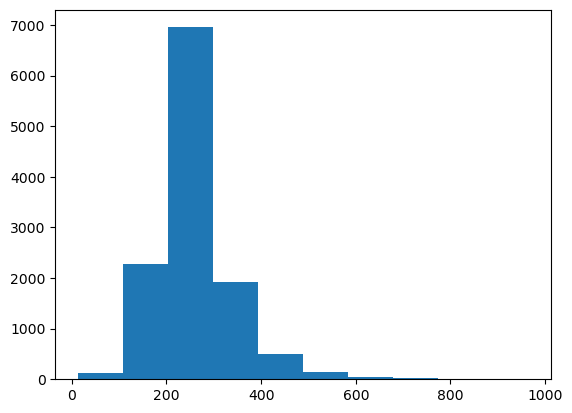

In [8]:
# Draw the Higgs pT
plt.hist(higgses.pt.compute())

In [9]:
# Example: large-radius "fat" jets
all_jets = events.FatJet

# What attributes do the jets have?
print(all_jets.fields)

['area', 'btagCSVV2', 'btagDDBvLV2', 'btagDDCvBV2', 'btagDDCvLV2', 'btagDeepB', 'btagHbb', 'deepTagMD_H4qvsQCD', 'deepTagMD_HbbvsQCD', 'deepTagMD_TvsQCD', 'deepTagMD_WvsQCD', 'deepTagMD_ZHbbvsQCD', 'deepTagMD_ZHccvsQCD', 'deepTagMD_ZbbvsQCD', 'deepTagMD_ZvsQCD', 'deepTagMD_bbvsLight', 'deepTagMD_ccvsLight', 'deepTag_H', 'deepTag_QCD', 'deepTag_QCDothers', 'deepTag_TvsQCD', 'deepTag_WvsQCD', 'deepTag_ZvsQCD', 'eta', 'mass', 'msoftdrop', 'n2b1', 'n3b1', 'particleNetMD_QCD', 'particleNetMD_Xbb', 'particleNetMD_Xcc', 'particleNetMD_Xqq', 'particleNet_H4qvsQCD', 'particleNet_HbbvsQCD', 'particleNet_HccvsQCD', 'particleNet_QCD', 'particleNet_TvsQCD', 'particleNet_WvsQCD', 'particleNet_ZvsQCD', 'particleNet_mass', 'phi', 'pt', 'rawFactor', 'tau1', 'tau2', 'tau3', 'tau4', 'lsf3', 'jetId', 'subJetIdx1', 'subJetIdx2', 'electronIdx3SJ', 'muonIdx3SJ', 'nConstituents', 'DDX_tau1_flightDistance2dSig', 'DDX_tau1_trackEtaRel_0', 'DDX_tau1_trackEtaRel_1', 'DDX_tau1_trackEtaRel_2', 'DDX_tau1_trackSip3dS

In [10]:
# Get the highest pT "leading" jet in each event
leading_jets = ak.firsts(all_jets[ak.argmax(all_jets.pt, axis=1, keepdims=True)])

(array([5.329e+03, 3.788e+03, 1.381e+03, 5.010e+02, 1.850e+02, 7.700e+01,
        4.200e+01, 1.700e+01, 6.000e+00, 2.000e+00]),
 array([ 170.125     ,  255.4125061 ,  340.70001221,  425.98748779,
         511.2749939 ,  596.5625    ,  681.84997559,  767.13751221,
         852.42498779,  937.71252441, 1023.        ]),
 <BarContainer object of 10 artists>)

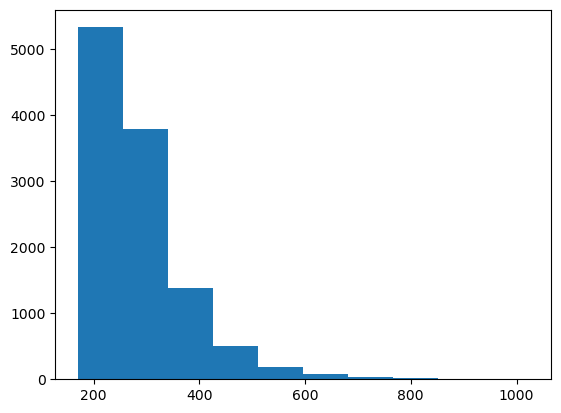

In [11]:
# Draw the jet pT
plt.hist(leading_jets.pt.compute())

(array([3.900e+01, 4.279e+03, 6.099e+03, 6.820e+02, 1.530e+02, 4.600e+01,
        1.700e+01, 9.000e+00, 1.000e+00, 3.000e+00]),
 array([-201.625     , -100.2585907 ,    1.10781252,  102.47422028,
         203.84062195,  305.20703125,  406.57342529,  507.93984985,
         609.30627441,  710.67266846,  812.0390625 ]),
 <BarContainer object of 10 artists>)

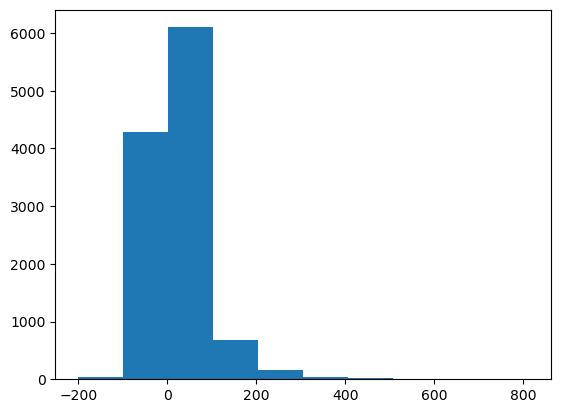

In [12]:
# Is the H pT and the leading jet pT always the same?
plt.hist((leading_jets.pt - higgses.pt).compute())

(array([3753.,   38.,   27.,  137., 1096., 4897., 1036.,  250.,   79.,
          15.]),
 array([4.09436267e-04, 5.96016228e-01, 1.19162309e+00, 1.78722990e+00,
        2.38283682e+00, 2.97844362e+00, 3.57405043e+00, 4.16965723e+00,
        4.76526403e+00, 5.36087084e+00, 5.95647764e+00]),
 <BarContainer object of 10 artists>)

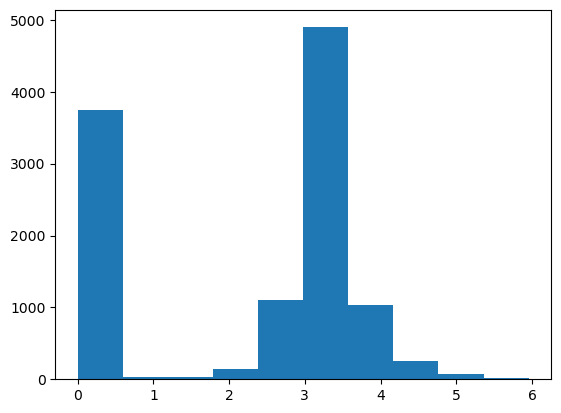

In [13]:
# Do the H and the jet always point the same way?
plt.hist(leading_jets.delta_r(higgses).compute())

In [14]:
# Get the jet with highest B-tag score in each event:
leading_jets = ak.firsts(all_jets[ak.argmax(all_jets.btagDDBvLV2, axis=1, keepdims=True)])

(array([5.000e+00, 2.900e+01, 1.567e+03, 8.874e+03, 7.310e+02, 8.400e+01,
        2.700e+01, 8.000e+00, 2.000e+00, 1.000e+00]),
 array([-424.96875   , -301.26797485, -177.56718445,  -53.86640549,
          69.83437347,  193.53515625,  317.2359314 ,  440.93670654,
         564.63751221,  688.33825684,  812.0390625 ]),
 <BarContainer object of 10 artists>)

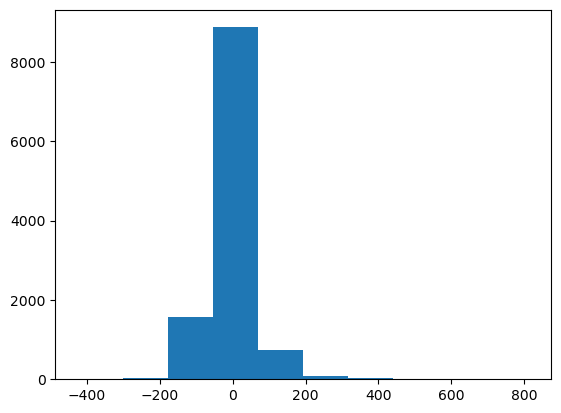

In [15]:
# Is the H pT and the leading jet pT always the same?
plt.hist((leading_jets.pt - higgses.pt).compute())

(array([7307.,  136.,   68.,  115.,  493., 2346.,  620.,  163.,   58.,
          22.]),
 array([4.09436267e-04, 5.86304486e-01, 1.17219961e+00, 1.75809467e+00,
        2.34398985e+00, 2.92988491e+00, 3.51577997e+00, 4.10167503e+00,
        4.68757010e+00, 5.27346516e+00, 5.85936022e+00]),
 <BarContainer object of 10 artists>)

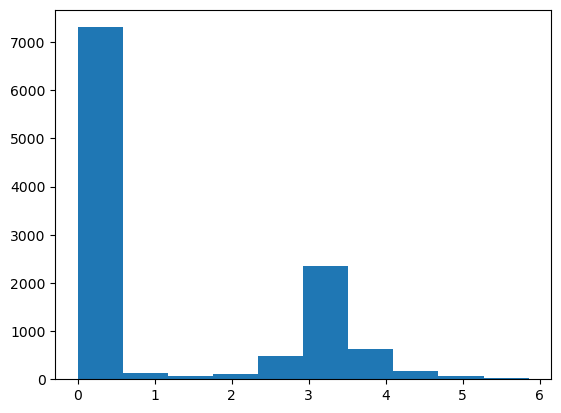

In [16]:
# Do the H and the jet always point the same way?
plt.hist(leading_jets.delta_r(higgses).compute())

In [17]:
# Which way of selecting the Higgs candidate jet is better?